# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generic Feed-Forward Neural Network

In [4]:
class FFN:
    
    def __init__(self,n_inputs,hidden,n_outputs):
        self.nx=n_inputs
        self.ny=n_outputs
        self.nh=len(hidden)
        self.sizes=[self.nx]+hidden+[self.ny]
        self.W={}
        self.B={}
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def grad_sigmoid(self,x):
        return x*(1-x)
    
    def forward_pass(self,x):
        A={}
        H={}
        H[0]=x.reshape(1,-1)
        for i in range(self.nh+1):
            A[i+1]=np.matmul(H[i],self.W[i+1])+self.B[i+1] 
            H[i+1]=self.sigmoid(A[i+1])
        return (A,H)
    
    def loss(self,y_pred,y_train):
        l=0
        m=len(y_pred)
        for i in range(m):
            l+=(y_pred[i]-y_train[i])**2
        return l/m
    
    def grad(self,X_train,y_train):
        dW={}
        dB={}
        for i in range(self.nh+1):
            dW[i+1]=np.zeros((self.sizes[i],self.sizes[i+1]))
            dB[i+1]=np.zeros((1,self.sizes[i+1]))
            
        for x,y in zip(X_train,y_train):
            A,H=self.forward_pass(x)
            dw = {}
            db = {}
            dH = {}
            dA = {}
            L = self.nh + 1
            dA[L] = np.multiply(np.multiply((H[L] - y),H[L]),(1-H[L]))
            for k in range(L, 0, -1):
                dw[k] = np.matmul(H[k-1].T,dA[k])
                db[k] = dA[k]
                dH[k-1] = np.matmul(dA[k], self.W[k].T)
                dA[k-1] = np.multiply(dH[k-1], self.grad_sigmoid(H[k-1]))
            
            for i in range(self.nh+1):
                dW[i+1]+=dw[i+1]
                dB[i+1]+=db[i+1]
        
        return dW,dB
    
    def fit(self,X_train,y_train,epochs=1,lr=0.1,display_loss=0):
        n=X_train.shape[1]
        for i in range(self.nh+1):
            self.W[i+1]=np.random.randn(self.sizes[i],self.sizes[i+1])
            self.B[i+1]=np.zeros((1,self.sizes[i+1]))
        losses=[]
        for _ in range(epochs):
            dW,dB=self.grad(X_train,y_train)
            for i in range(self.nh+1):
                self.W[i+1]-=(lr/n)*dW[i+1]
                self.B[i+1]-=(lr/n)*dB[i+1]
            L=self.loss(self.predict(X_train),y_train)
            losses+=[L]
        if display_loss==1:
            plt.plot(losses) 
            plt.xlabel("Epochs")
            plt.ylabel("sq_loss")
            plt.show()     
    
    def predict(self,X):
        y_pred=[]
        for x in X:
            y_pred+=[self.forward_pass(x)[1][self.nh+1].item(0)]
        return np.asarray(y_pred)

    def score(self,y_pred,y_test):
        m=len(y_pred)
        c=0
        for i in range(m):
            if y_pred[i]==y_test[i]:
                c+=1
        return c/m

# Fitting the Model on Data

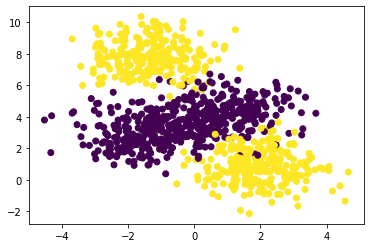

In [6]:
data,labels=make_blobs(n_samples=1000,n_features=2,centers=4,random_state=0)
labels_orig=labels
labels=np.mod(labels_orig,2)
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.25,stratify=labels,random_state=0)

In [8]:
fn=FFN(2,[2],1)

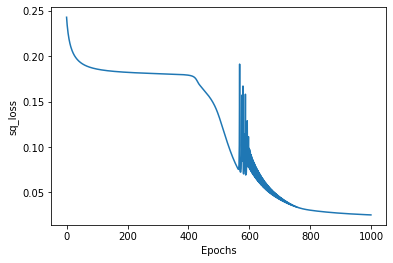

In [11]:
fn.fit(X_train,y_train,epochs=1000,lr=0.01,display_loss=1)

In [12]:
y_pred=fn.predict(X_test)
y_pred_b=(y_pred>=0.5).astype("int").ravel()

In [13]:
fn.score(y_pred_b,y_test)

0.94